In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [118]:
d1=pd.read_csv('concrete strength.csv')
d1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [119]:
d1.shape

(1030, 9)

In [120]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [121]:
d1.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817369
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705157
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [122]:
#there are 1030 rows.there is wider spread of datas for slag,cementage,fineagg(gap between min and max are higher)
#here mean is greater than median for cement,slag,ash,coarseagg,age and strength.so they are right skewed datas .
#and median is greater than mean for water,superplastic and fineagg.so they are left skewed datas.
#there are great difference between 75% and maximum for all columns,so outliers are present

In [123]:
d1.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [124]:
#there are no null values

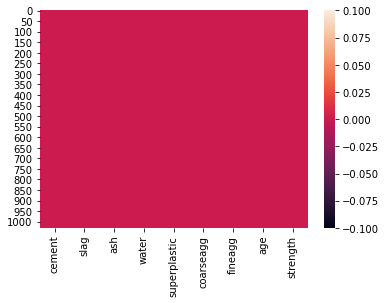

In [125]:
sns.heatmap(d1.isnull())

In [126]:
d1cor=d1.corr()
d1cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497761
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134864
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105729
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289629
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366129
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.165010
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167176
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328906
strength,0.497761,0.134864,-0.105729,-0.289629,0.366129,-0.165010,-0.167176,0.328906,1.000000


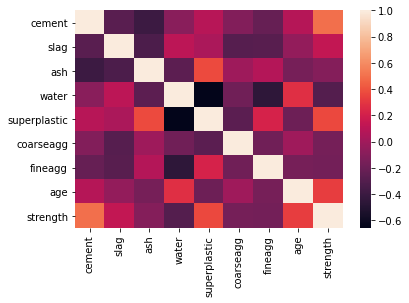

In [127]:
sns.heatmap(d1cor)

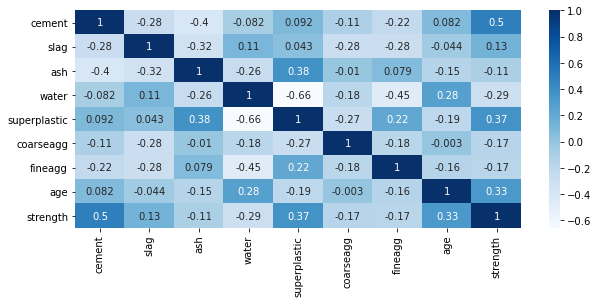

In [128]:
plt.figure(figsize=(10,4))
sns.heatmap(d1cor,cmap='Blues',annot=True)

In [129]:
#concrete strength has a negative relation with ash,water,coarseagg and fineagg
#concrete strength has positive relation with cement,slag,age and superplastic,that means concrete strength increases with amount of cement,slag,superplastic and age(setting time)

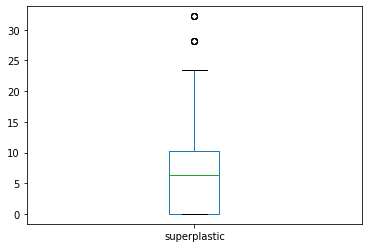

In [130]:
d1['superplastic'].plot.box()

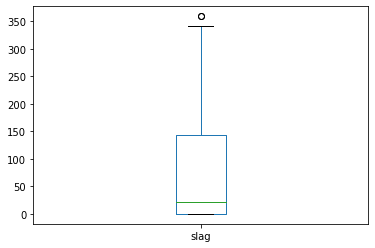

In [131]:
d1['slag'].plot.box()

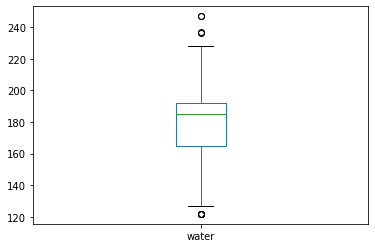

In [132]:
d1['water'].plot.box()

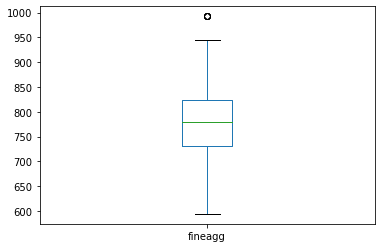

In [133]:
d1['fineagg'].plot.box()

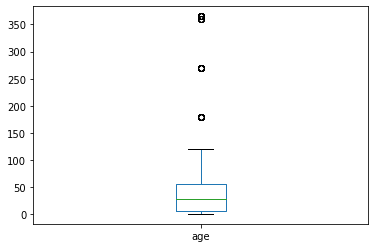

In [134]:
d1['age'].plot.box()

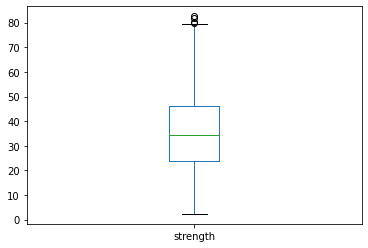

In [135]:
d1['strength'].plot.box()

In [136]:
collist=d1.columns.values
ncol=9
nrows=7

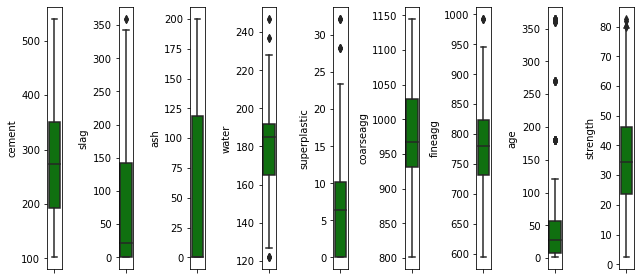

In [137]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [138]:
d1.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.417024
dtype: float64

In [139]:
#age is highly skewed.slag and super plastic is slightly skewed

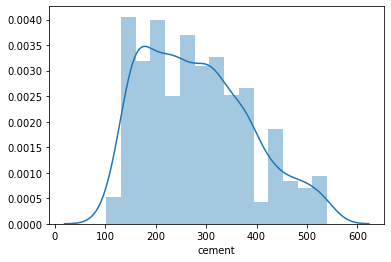

In [140]:
sns.distplot(d1['cement'])

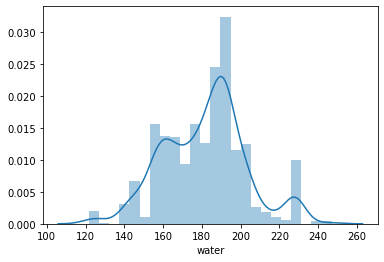

In [141]:
sns.distplot(d1['water'])

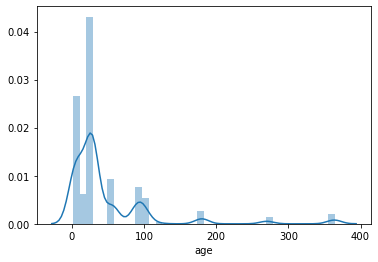

In [142]:
sns.distplot(d1['age'])

In [143]:
for col in d1.columns:
    if d1.skew().loc[col]>0.55:
        d1[col]=np.log1p(d1[col])

In [144]:
d1.skew()

cement          0.509481
slag           -0.032700
ash             0.537354
water           0.074628
superplastic   -0.324821
coarseagg      -0.040220
fineagg        -0.253010
age            -0.005085
strength        0.417024
dtype: float64

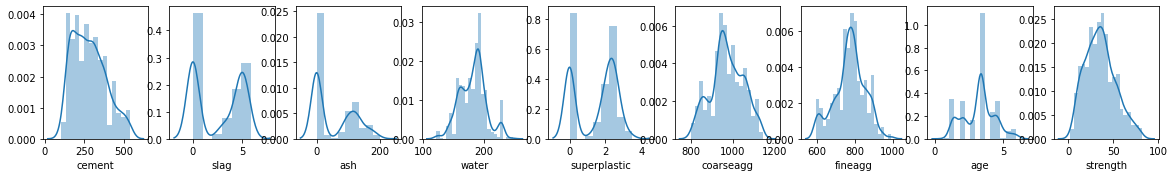

In [145]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

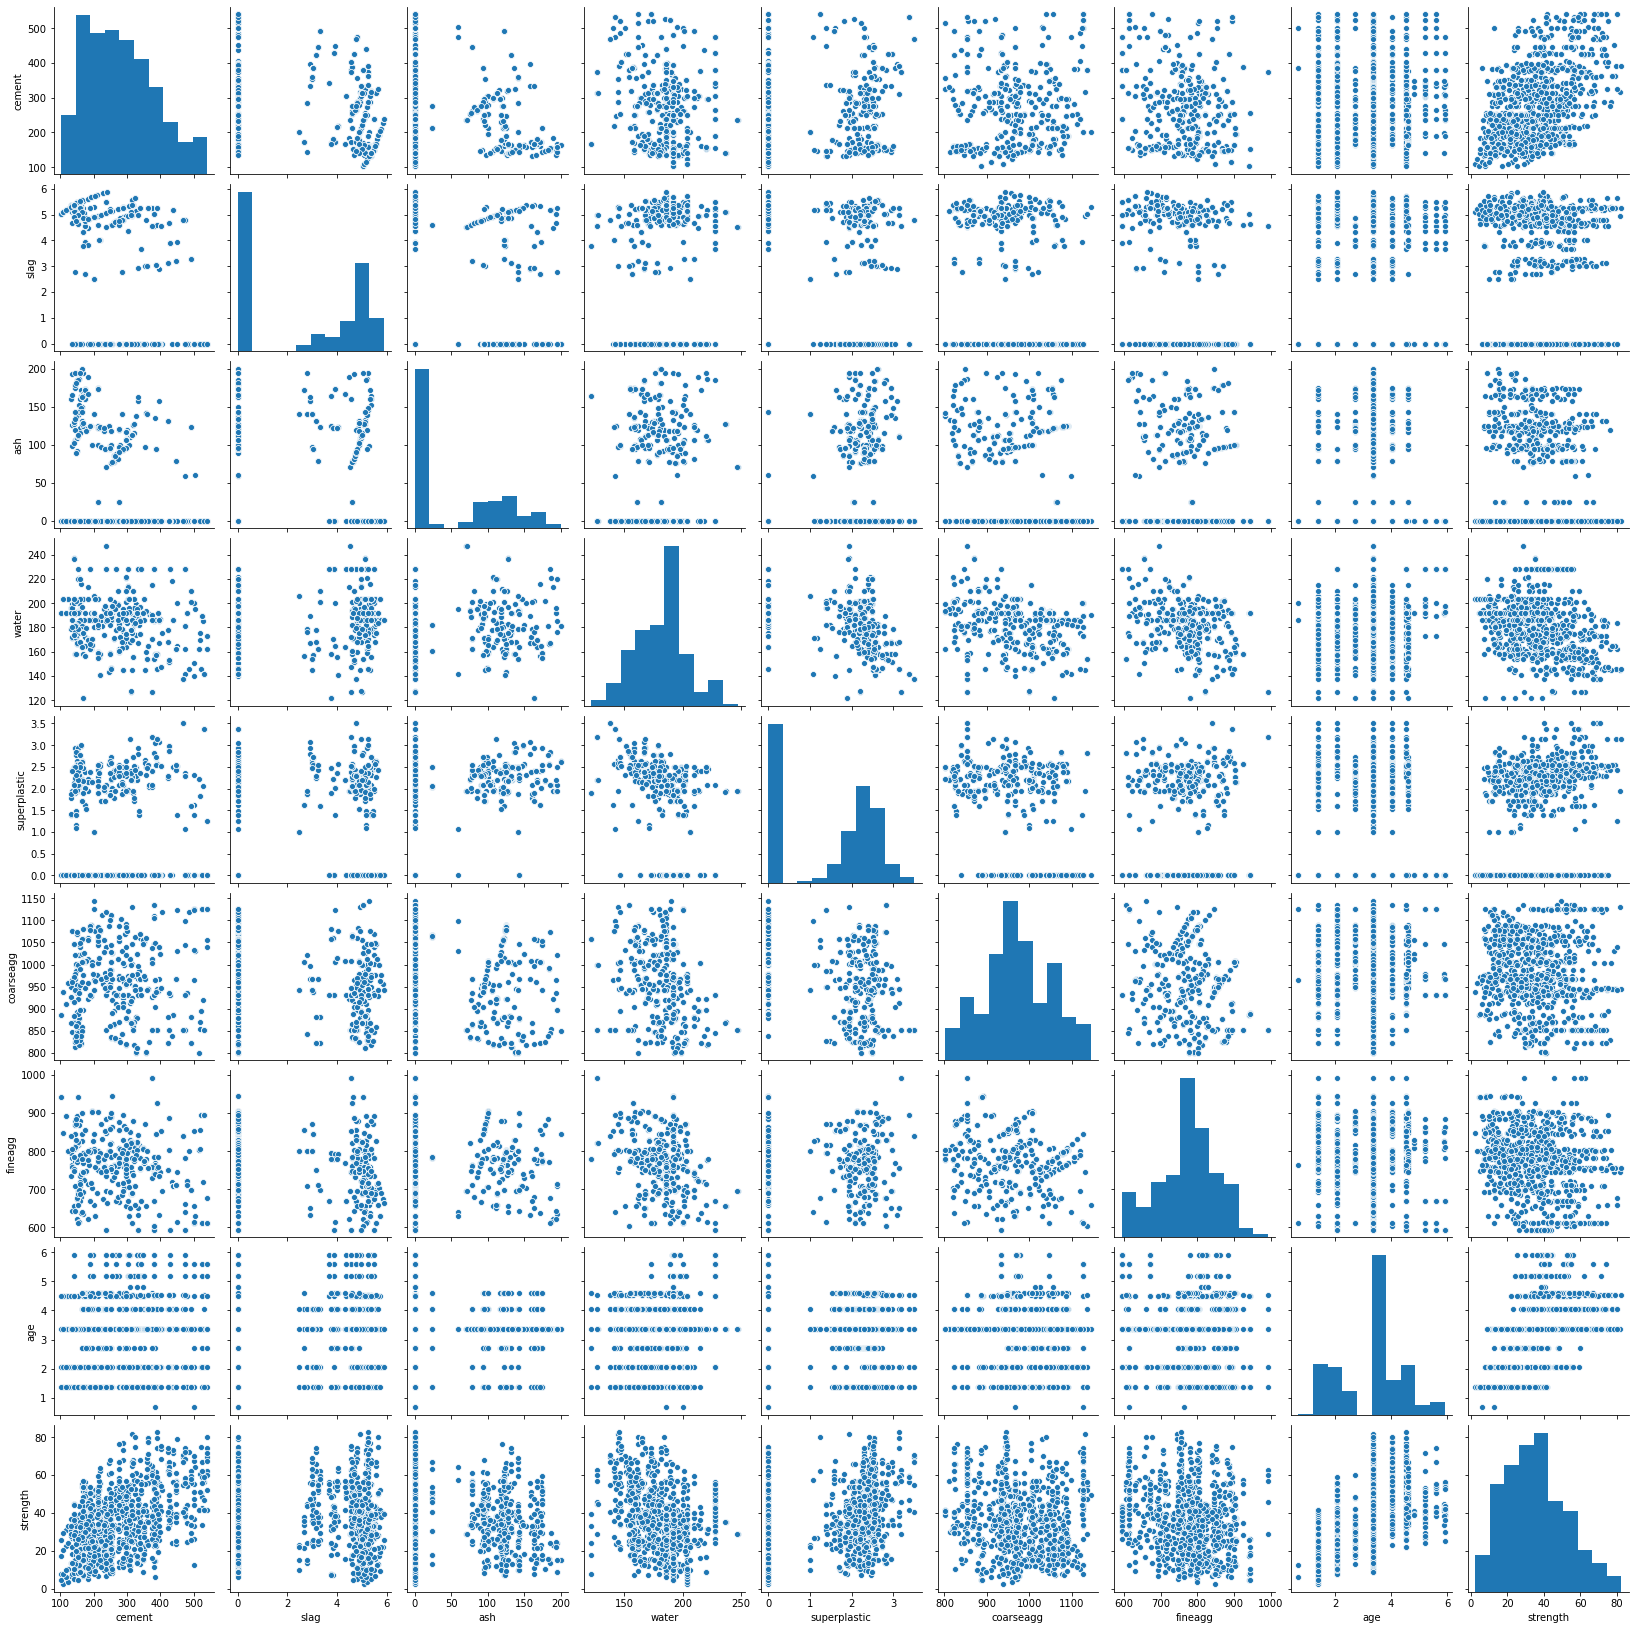

In [173]:
sns.pairplot(d1)

In [146]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(d1))
z

array([[1.33901711, 1.16467517, 0.84714393, ..., 0.31296991, 0.11270216,
        0.35499507],
       [1.07479007, 0.50284167, 1.09607803, ..., 0.28226038, 0.48127072,
        0.7370986 ],
       [0.29838379, 1.05932371, 0.64896501, ..., 1.09337085, 0.11270216,
        0.39512193],
       ...,
       [0.04564488, 0.91614585, 0.56454507, ..., 0.06589318, 0.11270216,
        0.50683404],
       [0.58237302, 0.46041383, 0.84714393, ..., 1.29254178, 2.1262525 ,
        1.15245724],
       [2.47791487, 1.05932371, 0.84714393, ..., 2.00382326, 1.04764004,
        0.96919128]])

In [147]:
threshold=3
print(np.where(z>3))

(array([ 66, 263], dtype=int64), array([3, 3], dtype=int64))


In [148]:
d1.new=d1[(z<3).all(axis=1)]
print(d1.shape)
print(d1.new.shape)

(1030, 9)
(1028, 9)


In [149]:
#2 rows are deleted due to presence of outliers

In [150]:
x=d1.new.iloc[:,0:-1]
x.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,5.361292,0.0,203.5,0.000000,971.8,748.5,3.367296
1,168.9,3.765840,124.3,158.3,2.468100,1080.8,796.2,2.708050
2,250.0,0.000000,95.7,187.4,1.871802,956.9,861.2,3.367296
3,266.0,4.744932,0.0,228.0,0.000000,932.0,670.0,3.367296
4,154.8,5.217107,0.0,193.3,2.312535,1047.4,696.7,3.367296


In [151]:
y=d1.new.iloc[:,-1]
y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

In [152]:
x.shape

(1028, 8)

In [153]:
y.shape

(1028,)

In [154]:
max_r_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 55 is 0.84195527381871


In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=55)

In [156]:
x_train.shape

(801, 8)

In [157]:
x_test.shape

(227, 8)

In [158]:
y_train.shape

(801,)

In [159]:
y_test.shape

(227,)

In [203]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.33877263,  1.16590142, -0.84586119, ..., -0.01742447,
        -0.31486008,  0.11281314],
       [-1.07475622,  0.50427764,  1.09560763, ...,  1.38701148,
         0.28034619, -0.48059013],
       [-0.29896885, -1.05739275,  0.64889799, ..., -0.209407  ,
         1.09142392,  0.11281314],
       ...,
       [-0.04643141,  0.91745085,  0.56455421, ..., -1.32780187,
        -0.06779333,  0.11281314],
       [ 0.58108587,  0.46186324, -0.84586119, ..., -0.53023687,
        -1.29439242,  2.12443248],
       [ 2.47511667, -1.05739275, -0.84586119, ...,  1.9565167 ,
        -2.00564519, -1.0464163 ]])

In [204]:
lm=LinearRegression()

In [205]:
lm.fit(x_train,y_train)

LinearRegression()

In [206]:
lm.coef_

array([ 8.81504353e-02,  2.22058612e+00,  9.09059896e-03, -2.09842412e-01,
        2.52721737e+00,  3.60350072e-03, -1.21393601e-02,  9.03325637e+00])

In [207]:
lm.intercept_

15.91104542448226

In [208]:
lm.score(x_train,y_train)

0.7948990068970927

In [209]:
#It has studied 79% of data and will predict rest 21%

In [210]:
pred=lm.predict(x_test)
print('predicted strength:',pred)
print('actual strength:',y_test)

predicted strength: [67.60384525 25.90831204 21.64726097 68.82762684 24.20798637 38.52340602
 36.87262723  5.8684641  26.15168233 31.40064743 25.70862094 34.15214183
 10.98518863 62.07726829  2.59917333 11.6809624  38.0193598  52.87906563
 37.95831025 32.06495686 37.43347254 51.78243644 41.88912582 19.50088798
 29.49772559  9.79831847 29.92260515 39.35445886 59.89006902 61.59505929
 24.87458218 20.0634161  49.32542632 17.55967666 18.41501493 44.33458376
 18.51408105 30.3547743  45.22685018 29.05816708 46.68170643 32.70809767
 53.04547143 41.11810904 38.03604424 29.30244455 36.22616723 20.71293521
 35.20221705 26.53290426 31.32920042 29.83784068 48.11286523 16.85289614
 62.02107185 55.49078717 30.79199174 59.43803597 28.51999881 30.0943297
 37.54350331 48.86004416 17.56349445 20.45639005 59.6269159  19.70660999
 43.49547572 38.7260477  24.99496278 16.28284045 30.27103245 26.53823375
 44.32745517 69.64567688 34.59017535 48.84804997 53.80658112 29.12394902
 55.87391269 23.88829999 17.0516

In [211]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 5.202714473927136
mean squared error: 45.785113166349355
root mean squared error: 6.766469771331972


In [212]:
print(r2_score(y_test,pred))

0.8420697651247039


In [213]:
#it shows how well the model works.ie,84%

In [214]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.78229012 0.83113113 0.79908795 0.80733472 0.77570239]
0.799109261376598 0.019615420682061166


In [226]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [227]:
from sklearn .linear_model import Lasso,Ridge, ElasticNet
ls=Lasso(alpha=.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7948989943821657

In [228]:
ls.coef_

array([ 8.81387473e-02,  2.22001915e+00,  9.09173964e-03, -2.09960408e-01,
        2.52504342e+00,  3.57797623e-03, -1.21604052e-02,  9.03243970e+00])

In [229]:
lscores=cross_val_score(ls,x,y,cv=5)
print(lscores)
print(lscores.mean(),lscores.std())

[0.78230913 0.83113614 0.79910128 0.80735189 0.77572317]
0.7991243212184356 0.019610277061380917


In [230]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7948990068970879

In [231]:
rd.coef_

array([ 8.81504314e-02,  2.22058593e+00,  9.09059959e-03, -2.09842444e-01,
        2.52721671e+00,  3.60349260e-03, -1.21393675e-02,  9.03325543e+00])

In [232]:
rdscores=cross_val_score(rd,x,y,cv=5)
print(rdscores)
print(rdscores.mean(),rdscores.std())

[0.78229013 0.83113113 0.79908795 0.80733472 0.77570238]
0.7991092628737002 0.019615422130983648


In [233]:
enr=ElasticNet(alpha=.001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.7948989013380238


array([ 8.81288584e-02,  2.21954932e+00,  9.09365079e-03, -2.10027849e-01,
        2.52352069e+00,  3.55822871e-03, -1.21793881e-02,  9.02905533e+00])

In [234]:
enrscores=cross_val_score(enr,x,y,cv=5)
print(enrscores)
print(enrscores.mean(),enrscores.std())

[0.78235211 0.83113315 0.79911833 0.80735378 0.77565625]
0.7991227247758405 0.019618085958788816


In [235]:
import joblib
joblib.dump(enr,'enr_strength.pkl')

['enr_strength.pkl']

# conclusion

In [236]:
#though linear regression,lasso,ridge and elasticnet gives almost same cross_val_score mean,elasticnet gives a slightly better prediction